In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [8]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [9]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30)), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [11]:
data_frame = pd.DataFrame(
    breast_cancer_dataset.data,
    columns=breast_cancer_dataset.feature_names
)

In [13]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
X = data_frame.drop('target', axis=1)
y = data_frame['target']

In [15]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [16]:
data_frame.shape

(569, 31)

In [17]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [19]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [20]:
X = data_frame.drop('target', axis=1)
y = data_frame['target']

In [26]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [33]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(16, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [30]:
y_pred = mlp.predict(X_test)


In [31]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

Test Accuracy: 95.61%

Confusion Matrix:
[[41  1]
 [ 4 68]]

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.91      0.98      0.94        42
      Benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data = load_breast_cancer()
X = data.data
y = data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(8, activation='relu'))  
model.add(Dense(1, activation='sigmoid')) 

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5187 - loss: 0.6607 - val_accuracy: 0.7281 - val_loss: 0.5436
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9033 - loss: 0.4352 - val_accuracy: 0.9035 - val_loss: 0.3708
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9582 - loss: 0.2790 - val_accuracy: 0.9386 - val_loss: 0.2483
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9604 - loss: 0.1862 - val_accuracy: 0.9386 - val_loss: 0.1877
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9670 - loss: 0.1432 - val_accuracy: 0.9474 - val_loss: 0.1593
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9736 - loss: 0.1182 - val_accuracy: 0.9474 - val_loss: 0.1457
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9736 - loss: 0.1035 - val_accuracy: 0.9474 - val_loss: 0.1352
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9758 - loss: 0.0926 - val_accuracy: 0.9474 - v

In [12]:
import matplotlib.pyplot as plt

In [13]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

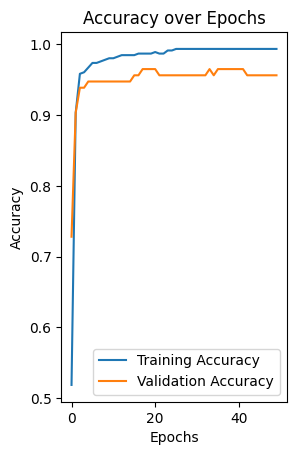

In [14]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

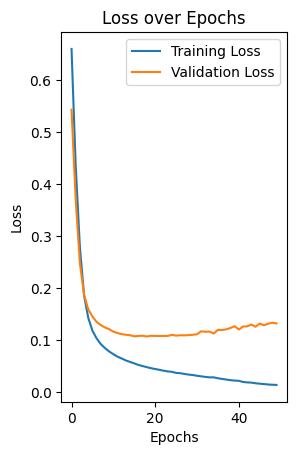

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
X_train_std = X_train
X_test_std = X_test

In [21]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAccuracy of the model on test data: {accuracy * 100:.2f}%")


Accuracy of the model on test data: 95.61%


In [22]:
print("\nShape of X_test_std:", X_test_std.shape)
print("First test sample (standardized):", X_test_std[0])


Shape of X_test_std: (114, 30)
First test sample (standardized): [ 1.56851278  2.16401585  1.74286587  1.62076364 -0.26537607  1.91593165
  1.09245512  1.69889576  0.30958918 -0.06988421  1.6582331  -0.03455846
  2.19927944  1.6097947  -0.2323368   1.19871549  0.18795672  0.55981664
 -0.16207336  0.52383207  1.86216011  1.70820774  2.17062246  1.91370109
 -0.18774006  1.74427462  0.68856004  1.20214432 -0.14043064  0.90036171]


In [23]:
Y_pred = model.predict(X_test_std)
print("\nShape of predictions:", Y_pred.shape)
print("First prediction (probability):", Y_pred[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Shape of predictions: (114, 1)
First prediction (probability): [1.5686748e-12]


In [24]:
print("\nStandardized Test Data:\n", X_test_std)


Standardized Test Data:
 [[ 1.56851278  2.16401585  1.74286587 ...  1.20214432 -0.14043064
   0.90036171]
 [-0.84027641 -0.5970672  -0.8741735  ... -1.10124064 -0.81429139
  -0.71323608]
 [-0.07072262  1.19138742  0.03202768 ...  0.57255843  1.14997397
   1.86841162]
 ...
 [ 0.3583966  -0.44935493  0.48264098 ...  1.63386036  0.54117564
   1.91191948]
 [-0.41401799  1.07321761 -0.42314565 ...  0.06139464 -0.1280378
   0.64747227]
 [-0.6829327  -0.69932953 -0.66607058 ... -0.23615965 -0.16211811
  -0.20147486]]


In [28]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [29]:
print("\nPredicted probabilities:")
print(Y_pred)


Predicted probabilities:
[[1.56867477e-12]
 [9.99994516e-01]
 [5.74799924e-05]
 [6.66097254e-02]
 [1.27727899e-15]
 [9.98627245e-01]
 [9.99979854e-01]
 [1.18159378e-12]
 [2.41095122e-09]
 [3.33226866e-19]
 [9.99104023e-01]
 [6.81827643e-08]
 [9.99934137e-01]
 [8.83620110e-09]
 [1.86547538e-06]
 [9.71365392e-01]
 [1.96590841e-01]
 [9.80148077e-01]
 [9.99984741e-01]
 [9.99846935e-01]
 [5.13316763e-07]
 [1.10143097e-03]
 [9.99698162e-01]
 [9.99993801e-01]
 [9.86984193e-01]
 [9.17662859e-01]
 [1.51260539e-15]
 [9.96545434e-01]
 [9.99735415e-01]
 [9.97780561e-01]
 [9.99985695e-01]
 [9.99996245e-01]
 [9.98447418e-01]
 [5.66215277e-01]
 [1.55953928e-09]
 [1.46186771e-02]
 [9.99501050e-01]
 [4.26121473e-01]
 [8.81465748e-02]
 [3.02571662e-10]
 [9.99981821e-01]
 [9.99977112e-01]
 [9.96709704e-01]
 [3.79029377e-11]
 [4.46325930e-06]
 [9.49319005e-01]
 [9.99998212e-01]
 [9.99954820e-01]
 [9.94871140e-01]
 [4.83266085e-08]
 [9.99967098e-01]
 [7.89037168e-01]
 [9.99939263e-01]
 [9.92892444e-01]
 [

In [31]:
import numpy as np
Y_pred_prob = np.array([
    [0.1, 0.7, 0.2],
    [0.8, 0.1, 0.1],
    [0.3, 0.3, 0.4]
])

Y_pred_class = np.argmax(Y_pred_prob, axis=1)

print("Prediction Probabilities:\n", Y_pred_prob)
print("Predicted Class Labels:", Y_pred_class)


Prediction Probabilities:
 [[0.1 0.7 0.2]
 [0.8 0.1 0.1]
 [0.3 0.3 0.4]]
Predicted Class Labels: [1 0 2]


In [32]:
Y_pred_prob = model.predict(X_test_std)

Y_pred_class = (Y_pred_prob > 0.5).astype("int32")

print("\nPrediction Probabilities:\n", Y_pred_prob)
print("\nPredicted Class Labels:\n", Y_pred_class)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Prediction Probabilities:
 [[1.56867477e-12]
 [9.99994516e-01]
 [5.74799924e-05]
 [6.66097254e-02]
 [1.27727899e-15]
 [9.98627245e-01]
 [9.99979854e-01]
 [1.18159378e-12]
 [2.41095122e-09]
 [3.33226866e-19]
 [9.99104023e-01]
 [6.81827643e-08]
 [9.99934137e-01]
 [8.83620110e-09]
 [1.86547538e-06]
 [9.71365392e-01]
 [1.96590841e-01]
 [9.80148077e-01]
 [9.99984741e-01]
 [9.99846935e-01]
 [5.13316763e-07]
 [1.10143097e-03]
 [9.99698162e-01]
 [9.99993801e-01]
 [9.86984193e-01]
 [9.17662859e-01]
 [1.51260539e-15]
 [9.96545434e-01]
 [9.99735415e-01]
 [9.97780561e-01]
 [9.99985695e-01]
 [9.99996245e-01]
 [9.98447418e-01]
 [5.66215277e-01]
 [1.55953928e-09]
 [1.46186771e-02]
 [9.99501050e-01]
 [4.26121473e-01]
 [8.81465748e-02]
 [3.02571662e-10]
 [9.99981821e-01]
 [9.99977112e-01]
 [9.96709704e-01]
 [3.79029377e-11]
 [4.46325930e-06]
 [9.49319005e-01]
 [9.99998212e-01]
 [9.99954820e-01]
 [9.94871140e-01]
 [4.83266085e-08]
 [9.99967098e-01]
 [7.89037168e-01

In [33]:
input_data = (17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 
              0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 
              153.4, 0.006399, 0.04904, 0.05373, 0.01587, 
              0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 
              0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189)
input_data_as_numpy = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy.reshape(1, -1)

input_data_std = scaler.transform(input_data_reshaped)

prediction_prob = model.predict(input_data_std)
prediction_class = (prediction_prob > 0.5).astype("int32")

print("Prediction Probability:", prediction_prob[0][0])
if prediction_class[0][0] == 0:
    print("The tumor is predicted to be MALIGNANT")
else:
    print("The tumor is predicted to be BENIGN")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Prediction Probability: 2.3005354e-14
The tumor is predicted to be MALIGNANT
